/tmp/ipykernel_5922/3378367514.py:74: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  n=np.int(tf/dt+0.1)


n 2400000


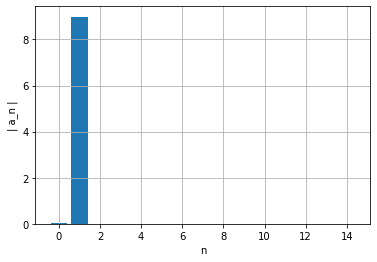

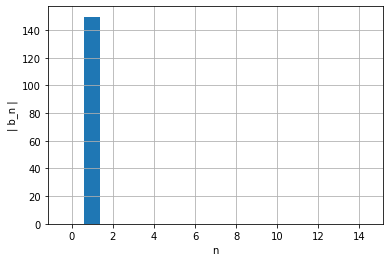

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Wed May 26 16:10:45 2021

@author:carlos Azevedo
"""

# Oscilador de Harmónico Forçado
# Método de Euler-Cromer

import numpy as np
import matplotlib.pyplot as plt



# def maximo(xm1,xm2,xm3,ym1,ym2,ym3):
#     xab=xm1-xm2
#     xac=xm1-xm3
#     xbc=xm2-xm3

#     a=ym1/(xab*xac)
#     b=-ym2/(xab*xbc)
#     c=ym3/(xac*xbc)

#     xmla=(b+c)*xm1+(a+c)*xm2+(a+b)*xm3
#     xmax=0.5*xmla/(a+b+c)

#     xta=xmax-xm1
#     xtb=xmax-xm2
#     xtc=xmax-xm3

#     ymax=a*xtb*xtc+b*xta*xtc+c*xta*xtb
#     return xmax, ymax

##DO ELEARNING
def abfourier(tp,xp,it0,it1,nf):
#
# cálculo dos coeficientes de Fourier a_nf e b_nf
#       a_nf = 2/T integral ( xp cos( nf w) ) dt   entre tp(it0) e tp(it1)
#       b_nf = 2/T integral ( xp sin( nf w) ) dt   entre tp(it0) e tp(it1)    
# integracao numerica pela aproximação trapezoidal
# input: matrizes tempo tp   (abcissas)
#                 posição xp (ordenadas) 
#       indices inicial it0
#               final   it1  (ao fim de um período)   
#       nf índice de Fourier
# output: af_bf e bf_nf  
# 
    dt=tp[1]-tp[0]
    per=tp[it1]-tp[it0]
    ome=2*np.pi/per

    s1=xp[it0]*np.cos(nf*ome*tp[it0])
    s2=xp[it1]*np.cos(nf*ome*tp[it1])
    st=xp[it0+1:it1]*np.cos(nf*ome*tp[it0+1:it1])
    soma=np.sum(st)
    
    q1=xp[it0]*np.sin(nf*ome*tp[it0])
    q2=xp[it1]*np.sin(nf*ome*tp[it1])
    qt=xp[it0+1:it1]*np.sin(nf*ome*tp[it0+1:it1])
    somq=np.sum(qt)
    
    intega=((s1+s2)/2+soma)*dt
    af=2/per*intega
    integq=((q1+q2)/2+somq)*dt
    bf=2/per*integq
    return af,bf




dt=0.0005
tf=1200.0
n=np.int(tf/dt+0.1)
print('n',n)

tempo=np.empty(n+1)
x=np.empty(n+1)
vx=np.empty(n+1)
a=np.empty(n+1)
en=np.empty(n+1)
enec=np.empty(n+1)
	  
t0=0.
x0=-2.0            
vx0=-4.0

tempo[0]=t0
vx[0]=vx0
x[0]=x0

k=1
m=1
b=0.05
F0=7.5
Wf=1
ampl=0
countMax=0
tMax=[]
periodo=[]


ind=np.transpose([0 for i in range(1000)])

afo=np.zeros(15)
bfo=np.zeros(15)


for i in range(n):
	tempo[i+1]=tempo[i]+dt
	a[i]=-(k/m)*x[i]-(b/m)*vx[i]+(F0/m)*np.cos(Wf*tempo[i])
	vx[i+1]=vx[i]+a[i]*dt
	x[i+1]=x[i]+vx[i+1]*dt
	en[i]=0.5*m*vx[i]**2+0.5*k*x[i]**2
	if tempo[i]>200 and x[i-1] < x[i] and  x[i+1] < x[i]  :
		# maxx, maxy=maximo(tempo[i-1], tempo[i], tempo[i+1], x[i-1], x[i], x[i+1])
		# ampl=ampl+maxy
		countMax=countMax+1
		ind[countMax]=int(i) #NOTA TEM DE SER UM INT
		


t0=ind[countMax-1]
t1=ind[countMax]    
for i in range(15):
    af, bf=abfourier(tempo,x,t0,t1,i)
    afo[i]=af
    bfo[i]=bf
    # print('afo = ',i,af,bf,np.sqrt(af**2+bf**2))



ii=np.linspace(0,14,15)
plt.figure()
plt.ylabel('| a_n |')
plt.xlabel('n')
plt.bar(ii,np.abs(afo))
plt.grid()
plt.show()



ii=np.linspace(0,14,15)
plt.figure()
plt.ylabel('| b_n |')
plt.xlabel('n')
plt.bar(ii,np.abs(bfo))
plt.grid()
plt.show()

